# Project: Image Classification and Regression 
## Rémi de Barbuat Duplessis

### 1. Simple Classification

In [1]:
from utils import *
from keras.models import Sequential 
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.utils.np_utils import to_categorical

Using TensorFlow backend.


In [2]:
[X_train, Y_train] = generate_dataset_classification(300, 20)
Y_train = to_categorical(Y_train)

Creating data:
0
100
200


#### a. First neural network

In [3]:
model = Sequential()
model.add(Dense(3, activation = 'softmax', input_dim = 5184))
model.compile(optimizer = 'sgd', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [4]:
model.fit(X_train[0:200], Y_train[0:200], validation_data=(X_train[200:300], Y_train[200:300]), epochs=10, batch_size=32)

Train on 200 samples, validate on 100 samples
Epoch 1/10
200/200 [==============================] - 0s 459us/step - loss: 8.6200 - acc: 0.3050 - val_loss: 11.4438 - val_acc: 0.2900
Epoch 2/10
200/200 [==============================] - 0s 62us/step - loss: 10.7185 - acc: 0.3350 - val_loss: 11.4438 - val_acc: 0.2900
Epoch 3/10
200/200 [==============================] - 0s 62us/step - loss: 10.7185 - acc: 0.3350 - val_loss: 11.4438 - val_acc: 0.2900
Epoch 4/10
200/200 [==============================] - 0s 65us/step - loss: 10.7185 - acc: 0.3350 - val_loss: 11.4438 - val_acc: 0.2900
Epoch 5/10
200/200 [==============================] - 0s 60us/step - loss: 10.7185 - acc: 0.3350 - val_loss: 11.4438 - val_acc: 0.2900
Epoch 6/10
200/200 [==============================] - 0s 60us/step - loss: 10.7185 - acc: 0.3350 - val_loss: 11.4438 - val_acc: 0.2900
Epoch 7/10
200/200 [==============================] - 0s 60us/step - loss: 10.7185 - acc: 0.3350 - val_loss: 11.4438 - val_acc: 0.2900
Epoch 8/1

#### b. Second neural network

In [5]:
model1 = Sequential()
model1.add(Dense(3, activation = 'softmax', input_dim = 5184))
model1.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [6]:
model1.fit(X_train[0:200], Y_train[0:200], validation_data=(X_train[200:300], Y_train[200:300]), epochs=10, batch_size=32)

Train on 200 samples, validate on 100 samples
Epoch 1/10
200/200 [==============================] - 0s 550us/step - loss: 2.3661 - acc: 0.2950 - val_loss: 1.5329 - val_acc: 0.6700
Epoch 2/10
200/200 [==============================] - 0s 66us/step - loss: 1.2245 - acc: 0.4850 - val_loss: 0.6530 - val_acc: 0.7200
Epoch 3/10
200/200 [==============================] - 0s 65us/step - loss: 0.9433 - acc: 0.6350 - val_loss: 0.6949 - val_acc: 0.5700
Epoch 4/10
200/200 [==============================] - 0s 66us/step - loss: 0.6345 - acc: 0.7150 - val_loss: 0.5034 - val_acc: 0.7900
Epoch 5/10
200/200 [==============================] - 0s 62us/step - loss: 0.5441 - acc: 0.7100 - val_loss: 0.4227 - val_acc: 0.8500
Epoch 6/10
200/200 [==============================] - 0s 63us/step - loss: 0.4393 - acc: 0.8000 - val_loss: 0.4800 - val_acc: 0.7300
Epoch 7/10
200/200 [==============================] - 0s 63us/step - loss: 0.3944 - acc: 0.8150 - val_loss: 0.4544 - val_acc: 0.7400
Epoch 8/10
200/200 [==

In [7]:
X_test_r = generate_a_rectangle()
X_test_d = generate_a_disk()
X_test_t = generate_a_triangle()[0]
X_test_r = X_test_r.reshape(1, X_test_r.shape[0])
X_test_d = X_test_d.reshape(1, X_test_d.shape[0])
X_test_t = X_test_t.reshape(1, X_test_t.shape[0])
print(model1.predict(X_test_r))
print(model1.predict(X_test_d))
print(model1.predict(X_test_t))

[[1. 0. 0.]]
[[0. 1. 0.]]
[[0. 0. 1.]]


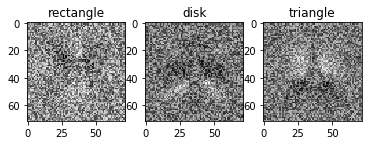

In [8]:
import matplotlib.pyplot as plt

weights = model1.get_weights()[0].reshape(72, 72, 3)

plt.subplot(131)
plt.imshow(weights[:,:,0], cmap='gray')
plt.title('rectangle')

plt.subplot(132)
plt.imshow(weights[:,:,1], cmap='gray')
plt.title('disk')

plt.subplot(133)
plt.imshow(weights[:,:,2], cmap='gray')
plt.title('triangle')

plt.show()

### 2. A more difficult classification problem

In [9]:
[X_train1, Y_train1] = generate_dataset_classification(1000, 20, True)
Y_train1 = to_categorical(Y_train1)
X_train1 = X_train1.reshape(1000,72,72,1)

Creating data:
0
100
200
300
400
500
600
700
800
900


In [15]:
[X_test1, Y_test1] = generate_test_set_classification()
X_test1 = X_test1.reshape(300,72,72,1)

Creating data:
0
100
200


In [18]:
X_test1.shape

(300, 72, 72, 1)

In [16]:
X_train_temp = X_train1.reshape(1000, 5184)
model.fit(X_train_temp, Y_train1, epochs=10, batch_size=32)

Epoch 1/10
1000/1000 [==============================] - 0s 44us/step - loss: 11.3794 - acc: 0.2940
Epoch 2/10
1000/1000 [==============================] - 0s 41us/step - loss: 11.3794 - acc: 0.2940
Epoch 3/10
1000/1000 [==============================] - 0s 41us/step - loss: 11.3794 - acc: 0.2940
Epoch 4/10
1000/1000 [==============================] - 0s 41us/step - loss: 11.3794 - acc: 0.2940
Epoch 5/10
1000/1000 [==============================] - 0s 42us/step - loss: 11.3794 - acc: 0.2940
Epoch 6/10
1000/1000 [==============================] - 0s 41us/step - loss: 11.3794 - acc: 0.2940
Epoch 7/10
1000/1000 [==============================] - 0s 41us/step - loss: 11.3794 - acc: 0.2940
Epoch 8/10
1000/1000 [==============================] - 0s 41us/step - loss: 11.3794 - acc: 0.2940
Epoch 9/10
1000/1000 [==============================] - 0s 41us/step - loss: 11.3794 - acc: 0.2940
Epoch 10/10
1000/1000 [==============================] - 0s 41us/step - loss: 11.3794 - acc: 0.2940


In [19]:
X_test_temp = X_test1.reshape(300, 5184)
model.evaluate(X_test_temp, Y_test1)

300/300 [==============================] - 0s 28us/step


[10.637942924499512, 0.34000000009934106]

In [20]:
from keras.layers import Conv2D, MaxPooling2D, Flatten

model2 = Sequential()
model2.add(Conv2D(16, (5, 5), activation = 'relu', input_shape = (72, 72, 1)))
model2.add(MaxPooling2D((2, 2)))
model2.add(Flatten())
model2.add(Dense(3, activation = 'softmax'))
model2.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [21]:
model2.fit(X_train1, Y_train1, epochs=10, batch_size=32)

Epoch 1/10
1000/1000 [==============================] - 2s 2ms/step - loss: 1.1443 - acc: 0.5220
Epoch 2/10
1000/1000 [==============================] - 2s 2ms/step - loss: 0.7553 - acc: 0.7110
Epoch 3/10
1000/1000 [==============================] - 2s 2ms/step - loss: 0.6488 - acc: 0.7530
Epoch 4/10
1000/1000 [==============================] - 2s 2ms/step - loss: 0.5857 - acc: 0.7710
Epoch 5/10
1000/1000 [==============================] - 2s 2ms/step - loss: 0.5319 - acc: 0.8000
Epoch 6/10
1000/1000 [==============================] - 2s 2ms/step - loss: 0.4893 - acc: 0.8170
Epoch 7/10
1000/1000 [==============================] - 2s 2ms/step - loss: 0.4525 - acc: 0.8450
Epoch 8/10
1000/1000 [==============================] - 2s 2ms/step - loss: 0.4125 - acc: 0.8660
Epoch 9/10
1000/1000 [==============================] - 2s 2ms/step - loss: 0.3895 - acc: 0.8680
Epoch 10/10
1000/1000 [==============================] - 2s 2ms/step - loss: 0.3844 - acc: 0.8710


In [23]:
model2.evaluate(X_test1, Y_test1)

300/300 [==============================] - 0s 989us/step


[0.653489863872528, 0.71]

### 3. A Regression Problem

In [24]:
[X_train2, Y_train2] = generate_dataset_regression(300, 20)
[X_test2, Y_test2] = generate_test_set_regression()
X_train2 = X_train2.reshape(300,72,72,1)
X_test2 = X_test2.reshape(300,72,72,1)

Creating data:
0
100
200
Creating data:
0
100
200


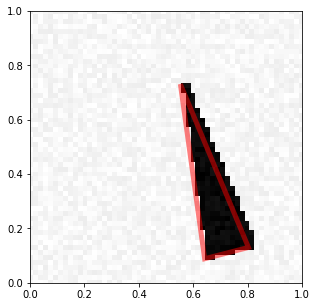

In [25]:
visualize_prediction(X_train2[0], Y_train2[0])

In [26]:
model3 = Sequential()
model3.add(Conv2D(64, (5,5), input_shape = (72,72,1), activation='relu'))
model3.add(MaxPooling2D(pool_size = (4,4)))
model3.add(Dropout(0.5))
model3.add(Conv2D(128, (5, 5), activation='relu'))
model3.add(Dropout(0.5))
model3.add(Conv2D(128, (5, 5), activation='relu'))
model3.add(Flatten())
model3.add(Dense(64, activation='relu'))
model3.add(Dropout(0.1))
model3.add(Dense(6))
print(model3.output_shape)
model3.compile(loss='mean_absolute_error', optimizer='adam')

(None, 6)


We normalize the vertices

In [27]:
def sort_vertices(dataset):
    res = np.zeros((300, 6))
    for i in range(0, 300):
        temp1 = [dataset[i,2*m] for m in range(0, 3)]
        j = np.argmax(temp1)
        k = np.argmin(temp1)
        l = 3 - j - k
        temp2 = [dataset[i,2*j], dataset[i,2*j+1], 
                dataset[i,2*k], dataset[i,2*k+1], 
                dataset[i,2*l], dataset[i,2*l+1]]
        if (dataset[i,2*j] == dataset[i,2*k] and dataset[i,2*j+1]<dataset[i,2*k+1]):
            temp2 = [dataset[i,2*k], dataset[i,2*k+1],
                     dataset[i,2*j], dataset[i,2*j+1],  
                    dataset[i,2*l], dataset[i,2*l+1]]
        elif (dataset[i,2*l] == dataset[i,2*k] and dataset[i,2*k+1]<dataset[i,2*l+1]):
            temp2 = [dataset[i,2*j], dataset[i,2*j+1],
                dataset[i,2*l], dataset[i,2*l+1],
                dataset[i,2*k], dataset[i,2*k+1]]
        res[i,:] = temp2
    return res

In [28]:
Y_train3 = sort_vertices(Y_train2)
Y_test3 = sort_vertices(Y_test2)

In [29]:
X_train2 = X_train2.reshape(300,72,72,1)

In [30]:
model3.fit(X_train2, Y_train3, epochs=10, batch_size=32)

Epoch 1/10
300/300 [==============================] - 3s 11ms/step - loss: 0.5315
Epoch 2/10
300/300 [==============================] - 3s 10ms/step - loss: 0.2568
Epoch 3/10
300/300 [==============================] - 3s 10ms/step - loss: 0.2312
Epoch 4/10
300/300 [==============================] - 3s 10ms/step - loss: 0.2201
Epoch 5/10
300/300 [==============================] - 3s 10ms/step - loss: 0.2033
Epoch 6/10
300/300 [==============================] - 3s 10ms/step - loss: 0.1939
Epoch 7/10
300/300 [==============================] - 3s 10ms/step - loss: 0.1946
Epoch 8/10
300/300 [==============================] - 3s 10ms/step - loss: 0.1847
Epoch 9/10
300/300 [==============================] - 3s 10ms/step - loss: 0.1819
Epoch 10/10
300/300 [==============================] - 3s 10ms/step - loss: 0.1774


In [31]:
model3.evaluate(X_test2, Y_test3)

300/300 [==============================] - 1s 3ms/step


0.16441553930441538

### 4. Image denoising